## Unzip

In [2]:
import zipfile

import numpy as np

with zipfile.ZipFile("md.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

## Assesment

1) Построить графики, как ведут себя best уровни стаканов (файл lobs) и price проведённых сделок (файл trades) во времени.
2) Посчитать статистики: 0.05 и 0.95 квантили, медиана, средняя, дисперсия для любой из указанных величин на выбор: размер трейда, объём какого-то фиксированного уровня стакана.
3) Построить гистограммы распределений а) для трейдов  и б) объёмов первых 5 уровней стканов. Строить нужно отдельно для каждой стороны стакана (bid/ask), объём на k-ом уровне считать кумулятивно (сумма первых k-уровней).
4) Также нужно построить график величины "пробития" стакана от размера трейда того, насколько "пробивается" стакан в результате трейда. Величиной пробития стакана называется величина измения best_price в результате трейда. Считать также стоит раздельно для каждой стороны.
5) Подумать над связями между ETH и BTC, возможно найти какие-то отставания в объемах торгов или корреляции между мидпрайсами.

### 1

Построить графики, как ведут себя best уровни стаканов (файл lobs) и price проведённых сделок (файл trades) во времени.

In [11]:
btc_prefix = "data/md/btcusdt_Binance_LinearPerpetual"
eth_prefix = "data/md/ethusdt_Binance_LinearPerpetual"

lobs_suffix = "/lobs.csv"
trades_suffix = "/trades.csv"

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Уровни стаканов

In [12]:
btc_lobs = pd.read_csv(btc_prefix + lobs_suffix)
btc_lobs

,receive_ts,exchange_ts,btcusdt:Binance:LinearPerpetual_ask_price_0,btcusdt:Binance:LinearPerpetual_ask_vol_0,btcusdt:Binance:LinearPerpetual_bid_price_0,btcusdt:Binance:LinearPerpetual_bid_vol_0,btcusdt:Binance:LinearPerpetual_ask_price_1,btcusdt:Binance:LinearPerpetual_ask_vol_1,btcusdt:Binance:LinearPerpetual_bid_price_1,btcusdt:Binance:LinearPerpetual_bid_vol_1,...,btcusdt:Binance:LinearPerpetual_bid_price_7,btcusdt:Binance:LinearPerpetual_bid_vol_7,btcusdt:Binance:LinearPerpetual_ask_price_8,btcusdt:Binance:LinearPerpetual_ask_vol_8,btcusdt:Binance:LinearPerpetual_bid_price_8,btcusdt:Binance:LinearPerpetual_bid_vol_8,btcusdt:Binance:LinearPerpetual_ask_price_9,btcusdt:Binance:LinearPerpetual_ask_vol_9,btcusdt:Binance:LinearPerpetual_bid_price_9,btcusdt:Binance:LinearPerpetual_bid_vol_9
0,1655942402250125991,1655942402249000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19976.7,0.066,...,19975.7,4.455,19980.1,0.01,19975.6,1.529,19980.2,0.010,19975.4,1.641
1,1655942402657844605,1655942402655000000,19977.5,0.078,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
2,1655942403346968722,1655942403346000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
3,1655942404080791047,1655942404080000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
4,1655942404452706766,1655942404452000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541351,1656028781390653694,1656028781390000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.5,0.55,21087.1,0.232,21092.6,0.001,21087.0,2.484
2541352,1656028781423672729,1656028781423000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484
2541353,1656028781457683317,1656028781457000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484
2541354,1656028781492806433,1656028781492000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484


In [21]:
eth_lobs = pd.read_csv(eth_prefix + lobs_suffix)
eth_lobs

,receive_ts,exchange_ts,ethusdt:Binance:LinearPerpetual_ask_price_0,ethusdt:Binance:LinearPerpetual_ask_vol_0,ethusdt:Binance:LinearPerpetual_bid_price_0,ethusdt:Binance:LinearPerpetual_bid_vol_0,ethusdt:Binance:LinearPerpetual_ask_price_1,ethusdt:Binance:LinearPerpetual_ask_vol_1,ethusdt:Binance:LinearPerpetual_bid_price_1,ethusdt:Binance:LinearPerpetual_bid_vol_1,...,ethusdt:Binance:LinearPerpetual_bid_price_7,ethusdt:Binance:LinearPerpetual_bid_vol_7,ethusdt:Binance:LinearPerpetual_ask_price_8,ethusdt:Binance:LinearPerpetual_ask_vol_8,ethusdt:Binance:LinearPerpetual_bid_price_8,ethusdt:Binance:LinearPerpetual_bid_vol_8,ethusdt:Binance:LinearPerpetual_ask_price_9,ethusdt:Binance:LinearPerpetual_ask_vol_9,ethusdt:Binance:LinearPerpetual_bid_price_9,ethusdt:Binance:LinearPerpetual_bid_vol_9
0,1655942402250395360,1655942402249000000,1049.45,1.046,1049.44,0.782,1049.46,2.229,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
1,1655942402656012600,1655942402655000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
2,1655942403348658915,1655942403348000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
3,1655942404080743828,1655942404080000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
4,1655942404151722232,1655942404151000000,1049.45,0.314,1049.44,19.860,1049.46,2.243,1049.43,5.00,...,1049.31,7.495,1049.53,2.229,1049.30,1.452,1049.54,27.741,1049.29,2.387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539694,1656028781406860422,1656028781406000000,1143.63,19.992,1143.62,23.868,1143.67,2.348,1143.61,4.35,...,1143.50,0.016,1143.78,4.445,1143.49,1.755,1143.79,14.975,1143.47,0.505
2539695,1656028781441496250,1656028781441000000,1143.63,19.992,1143.62,23.868,1143.67,2.348,1143.61,4.35,...,1143.50,0.016,1143.78,4.445,1143.49,1.755,1143.79,14.975,1143.47,0.505
2539696,1656028781474705210,1656028781474000000,1143.63,19.992,1143.62,23.868,1143.67,2.348,1143.61,4.35,...,1143.50,0.016,1143.78,4.445,1143.49,1.755,1143.79,14.975,1143.47,0.505
2539697,1656028781508489746,1656028781508000000,1143.63,20.026,1143.62,23.868,1143.67,2.348,1143.61,4.35,...,1143.50,0.016,1143.78,4.445,1143.49,1.755,1143.79,14.975,1143.47,0.505


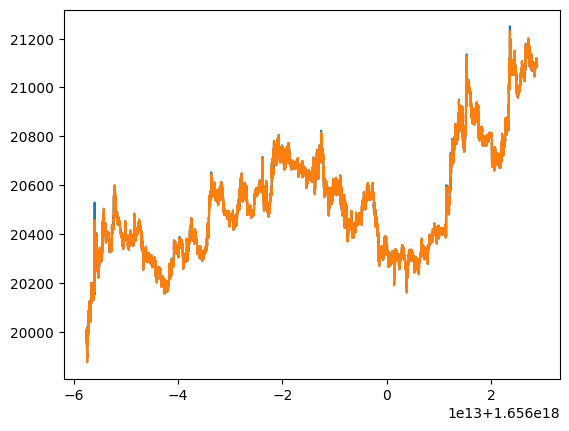

In [25]:
plt.plot(btc_lobs[' exchange_ts'], btc_lobs['btcusdt:Binance:LinearPerpetual_ask_price_0'])
plt.plot(btc_lobs[' exchange_ts'], btc_lobs['btcusdt:Binance:LinearPerpetual_bid_price_0'])

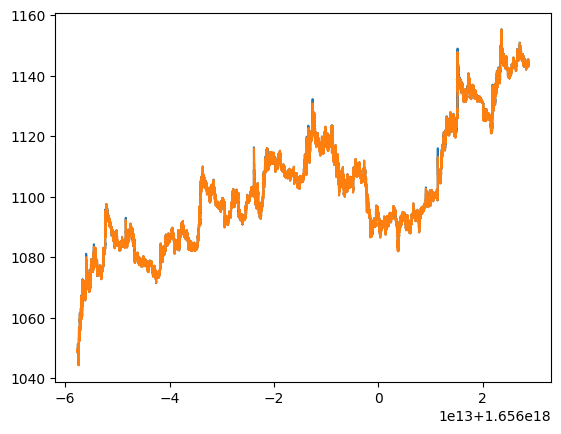

In [24]:
plt.plot(eth_lobs[' exchange_ts'], eth_lobs['ethusdt:Binance:LinearPerpetual_ask_price_0'])
plt.plot(eth_lobs[' exchange_ts'], eth_lobs['ethusdt:Binance:LinearPerpetual_bid_price_0'])

Ответ: Ооооочень похожи с точностью до множителя. ну а так - стандартно колебаются.

#### Price сделок

In [26]:
btc_trades = pd.read_csv(btc_prefix + trades_suffix)
btc_trades

,receive_ts,exchange_ts,aggro_side,price,size
0,1655942402624789714,1655942402623000000,BID,19977.5,0.001
1,1655942405293556247,1655942405292000000,BID,19977.5,0.041
2,1655942405293628020,1655942405292000000,BID,19977.5,0.036
3,1655942405293832021,1655942405292000000,BID,19977.5,0.001
4,1655942405293929517,1655942405292000000,BID,19977.5,0.001
...,...,...,...,...,...
5727709,1656028781074283766,1656028781073000000,BID,21089.1,0.001
5727710,1656028781105532654,1656028781104000000,ASK,21089.0,0.059
5727711,1656028781335919353,1656028781335000000,ASK,21089.0,0.137
5727712,1656028781343654663,1656028781342000000,BID,21089.1,0.030


In [27]:
eth_trades = pd.read_csv(eth_prefix + trades_suffix)
eth_trades

,receive_ts,exchange_ts,aggro_side,price,size
0,1655942402218452815,1655942402217000000,BID,1049.45,0.062
1,1655942402624182869,1655942402623000000,BID,1049.45,0.726
2,1655942402624767109,1655942402623000000,BID,1049.45,0.001
3,1655942402626135583,1655942402623000000,ASK,1049.44,0.022
4,1655942402627026454,1655942402624000000,BID,1049.45,0.005
...,...,...,...,...,...
4873798,1656028780700723809,1656028780700000000,BID,1143.63,0.005
4873799,1656028780953848112,1656028780953000000,ASK,1143.62,8.744
4873800,1656028780991774028,1656028780991000000,BID,1143.63,0.066
4873801,1656028781021533873,1656028781020000000,ASK,1143.62,0.174


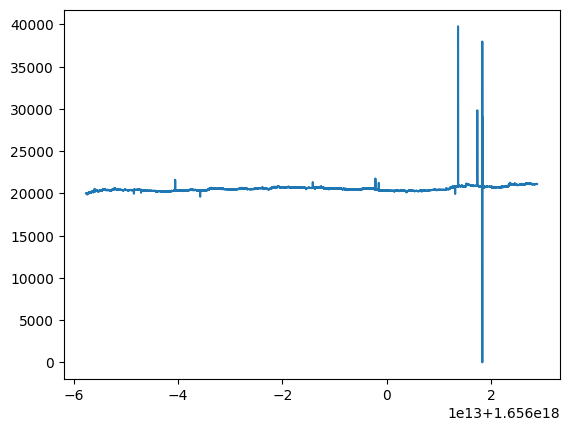

In [30]:
plt.plot(btc_trades['exchange_ts'], btc_trades['price'])

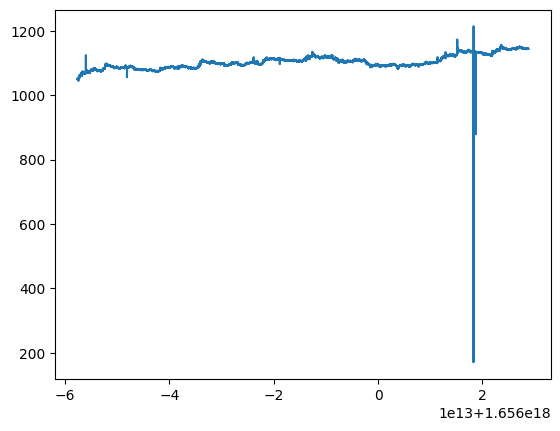

In [31]:
plt.plot(eth_trades['exchange_ts'], eth_trades['price'])

Ответ: здесь все консервативненько. Скорее всего любые колебания вызывают реакцию "да сейчас обратно вернутся". Не особо понятна природа колебаний на этих графиках - это не обычный outlier в data science. Тут реально кто-то что-то странное сделал. Мб продал очень много или купил очень много.

### 2

Посчитать статистики: 0.05 и 0.95 квантили, медиана, средняя, дисперсия для любой из указанных величин на выбор: размер трейда, объём какого-то фиксированного уровня стакана

In [34]:
trade_size = btc_trades['size']

In [41]:
# Quantile 0.05
q_005 = np.quantile(trade_size, 0.05)
q_005

0.001

In [42]:
# Quantile 0.95
q_095 = np.quantile(trade_size, 0.95)
q_095

0.519

In [45]:
# Median
med = trade_size.median()
med

0.017

In [46]:
# Mean
mean = trade_size.mean()
mean

0.12200803165102181

In [49]:
# Dispersion
disp = trade_size.std()
disp

0.5596711100568746

### 3

Построить гистограммы распределений а) для трейдов (вероятно size) и б) объёмов первых 5 уровней стканов. Строить нужно отдельно для каждой стороны стакана (bid/ask), объём на k-ом уровне считать кумулятивно (сумма первых k-уровней).

#### A

[]

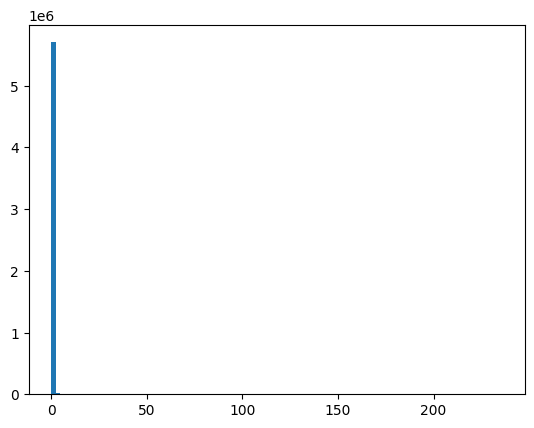

In [56]:
plt.hist(btc_trades['size'], bins=100)
plt.plot()

Так себе

[]

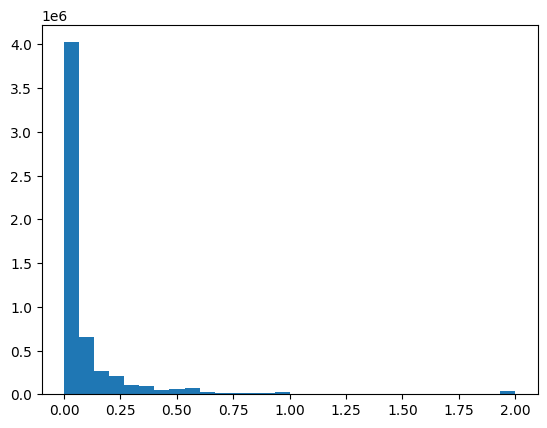

In [59]:
plt.hist(btc_trades['size'].clip(0, 2), bins=30)
plt.plot()

#### B

In [61]:
btc_lobs

,receive_ts,exchange_ts,btcusdt:Binance:LinearPerpetual_ask_price_0,btcusdt:Binance:LinearPerpetual_ask_vol_0,btcusdt:Binance:LinearPerpetual_bid_price_0,btcusdt:Binance:LinearPerpetual_bid_vol_0,btcusdt:Binance:LinearPerpetual_ask_price_1,btcusdt:Binance:LinearPerpetual_ask_vol_1,btcusdt:Binance:LinearPerpetual_bid_price_1,btcusdt:Binance:LinearPerpetual_bid_vol_1,...,btcusdt:Binance:LinearPerpetual_bid_price_7,btcusdt:Binance:LinearPerpetual_bid_vol_7,btcusdt:Binance:LinearPerpetual_ask_price_8,btcusdt:Binance:LinearPerpetual_ask_vol_8,btcusdt:Binance:LinearPerpetual_bid_price_8,btcusdt:Binance:LinearPerpetual_bid_vol_8,btcusdt:Binance:LinearPerpetual_ask_price_9,btcusdt:Binance:LinearPerpetual_ask_vol_9,btcusdt:Binance:LinearPerpetual_bid_price_9,btcusdt:Binance:LinearPerpetual_bid_vol_9
0,1655942402250125991,1655942402249000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19976.7,0.066,...,19975.7,4.455,19980.1,0.01,19975.6,1.529,19980.2,0.010,19975.4,1.641
1,1655942402657844605,1655942402655000000,19977.5,0.078,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
2,1655942403346968722,1655942403346000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
3,1655942404080791047,1655942404080000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
4,1655942404452706766,1655942404452000000,19977.5,0.079,19977.4,12.381,19977.8,0.003,19977.3,0.126,...,19975.9,0.246,19980.1,0.01,19975.8,0.686,19980.2,0.010,19975.7,4.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541351,1656028781390653694,1656028781390000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.5,0.55,21087.1,0.232,21092.6,0.001,21087.0,2.484
2541352,1656028781423672729,1656028781423000000,21089.1,0.730,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484
2541353,1656028781457683317,1656028781457000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484
2541354,1656028781492806433,1656028781492000000,21089.1,0.736,21089.0,7.845,21089.3,0.001,21088.9,2.800,...,21087.4,0.024,21092.4,0.83,21087.1,0.232,21092.5,0.550,21087.0,2.484


In [63]:
btc_lobs['ask_cumvol_0'] = btc_lobs['btcusdt:Binance:LinearPerpetual_ask_vol_0']
for i in range(1, 5):
    btc_lobs['ask_cumvol_' + str(i)] = btc_lobs['ask_cumvol_' + str(i - 1)] + btc_lobs['btcusdt:Binance:LinearPerpetual_ask_vol_' + str(i - 1)]

In [64]:
btc_lobs['bid_cumvol_0'] = btc_lobs['btcusdt:Binance:LinearPerpetual_bid_vol_0']
for i in range(1, 5):
    btc_lobs['bid_cumvol_' + str(i)] = btc_lobs['bid_cumvol_' + str(i - 1)] + btc_lobs['btcusdt:Binance:LinearPerpetual_bid_vol_' + str(i - 1)]

In [79]:
eth_lobs['ask_cumvol_0'] = eth_lobs['ethusdt:Binance:LinearPerpetual_ask_vol_0']
for i in range(1, 5):
    eth_lobs['ask_cumvol_' + str(i)] = eth_lobs['ask_cumvol_' + str(i - 1)] + eth_lobs['ethusdt:Binance:LinearPerpetual_ask_vol_' + str(i - 1)]

In [80]:
eth_lobs['bid_cumvol_0'] = eth_lobs['ethusdt:Binance:LinearPerpetual_bid_vol_0']
for i in range(1, 5):
    eth_lobs['bid_cumvol_' + str(i)] = eth_lobs['bid_cumvol_' + str(i - 1)] + eth_lobs['ethusdt:Binance:LinearPerpetual_bid_vol_' + str(i - 1)]

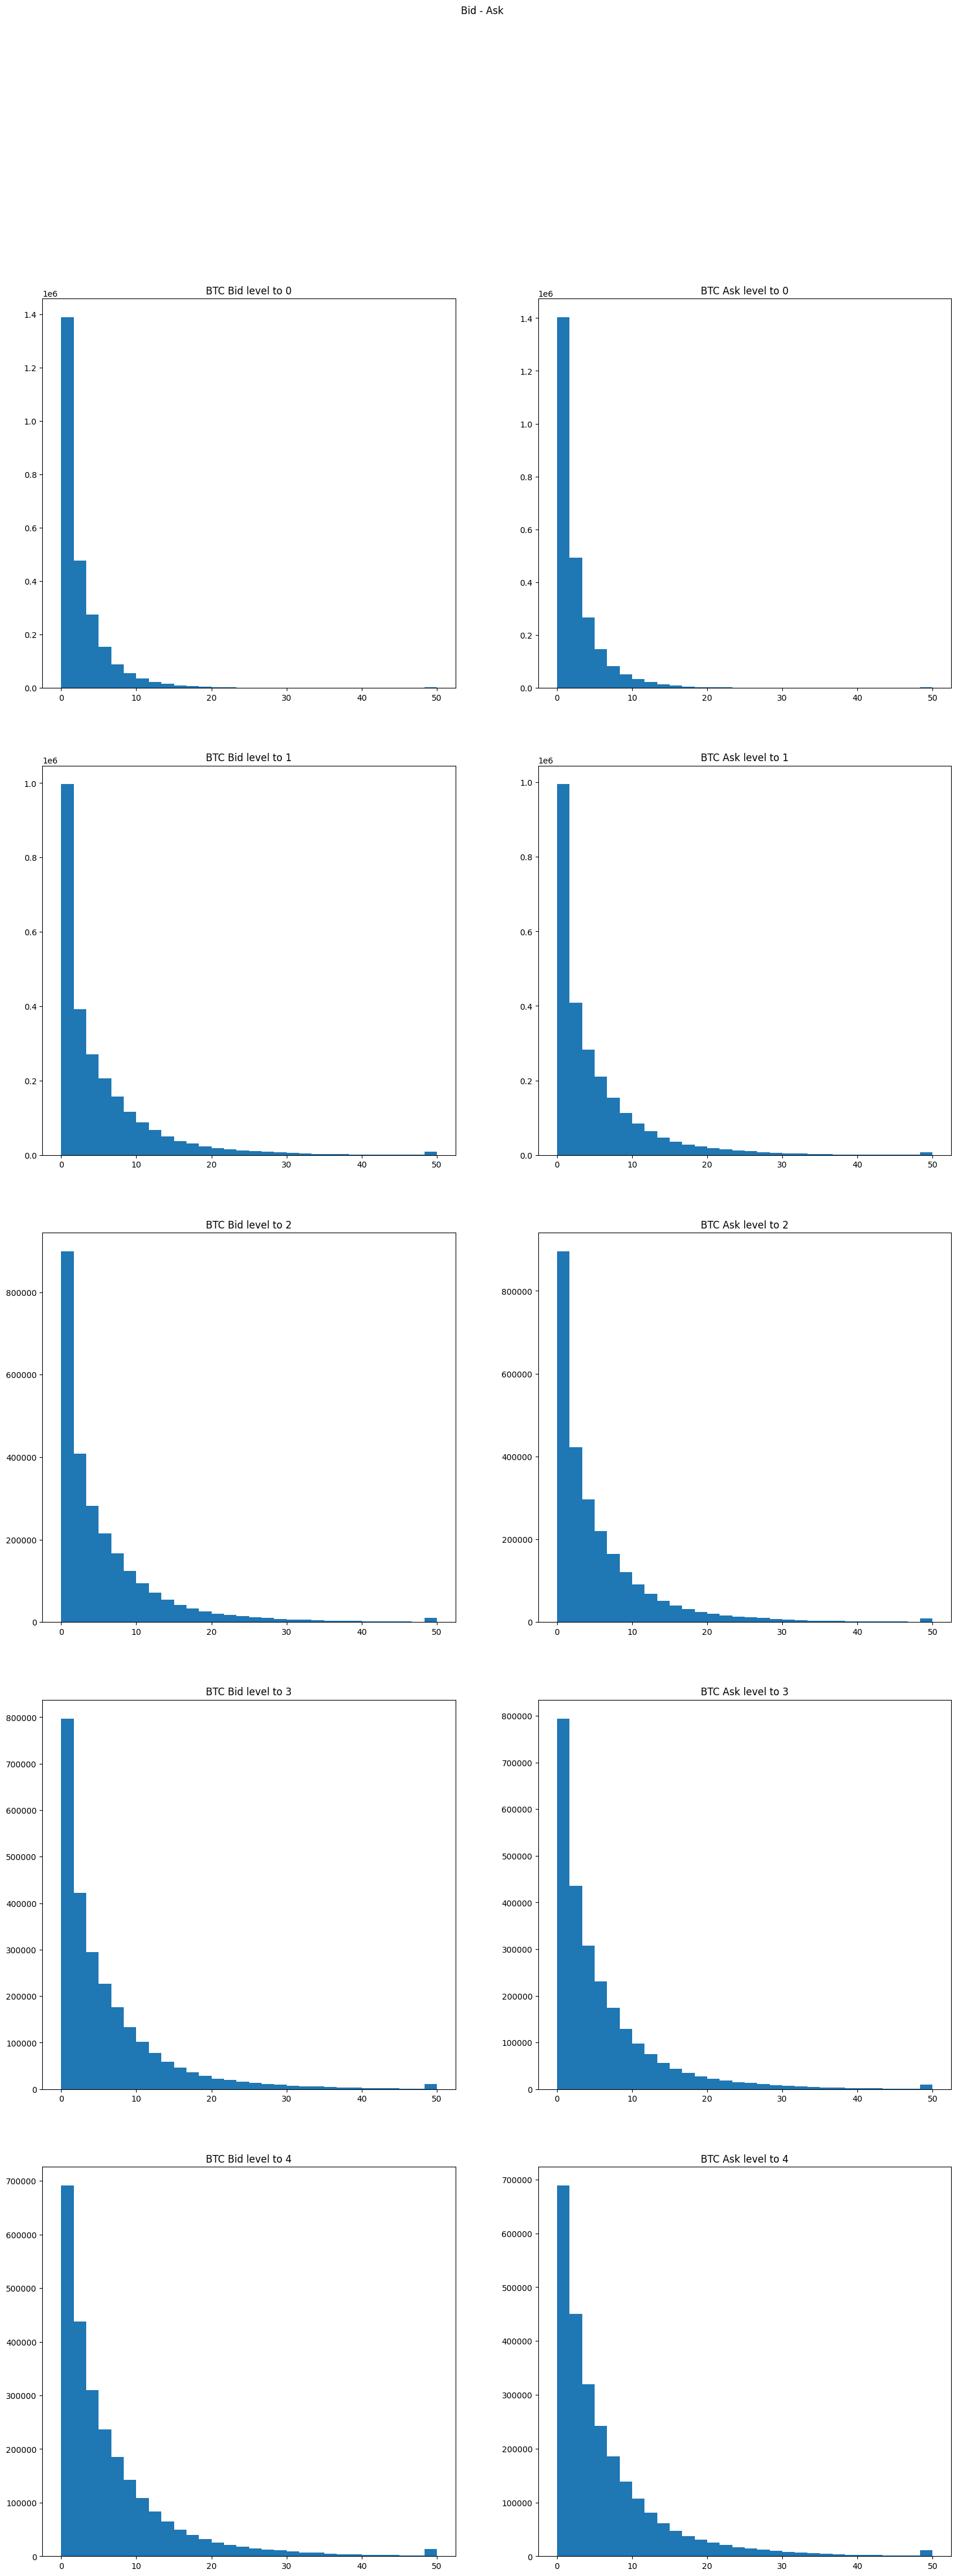

In [89]:
fig, axs = plt.subplots(5, 2, figsize=(20, 50))
fig.suptitle('Bid - Ask')

clip_n_btc = 50
clip_n_eth = 300
n_bins=30

for i in range(5):
    axs[i][0].hist(btc_lobs['bid_cumvol_' + str(i)].clip(0, clip_n_btc), bins=n_bins)
    axs[i][0].set_title('BTC Bid level to ' + str(i))
    axs[i][1].hist(btc_lobs['ask_cumvol_' + str(i)].clip(0, clip_n_btc), bins=n_bins)
    axs[i][1].set_title('BTC Ask level to ' + str(i))

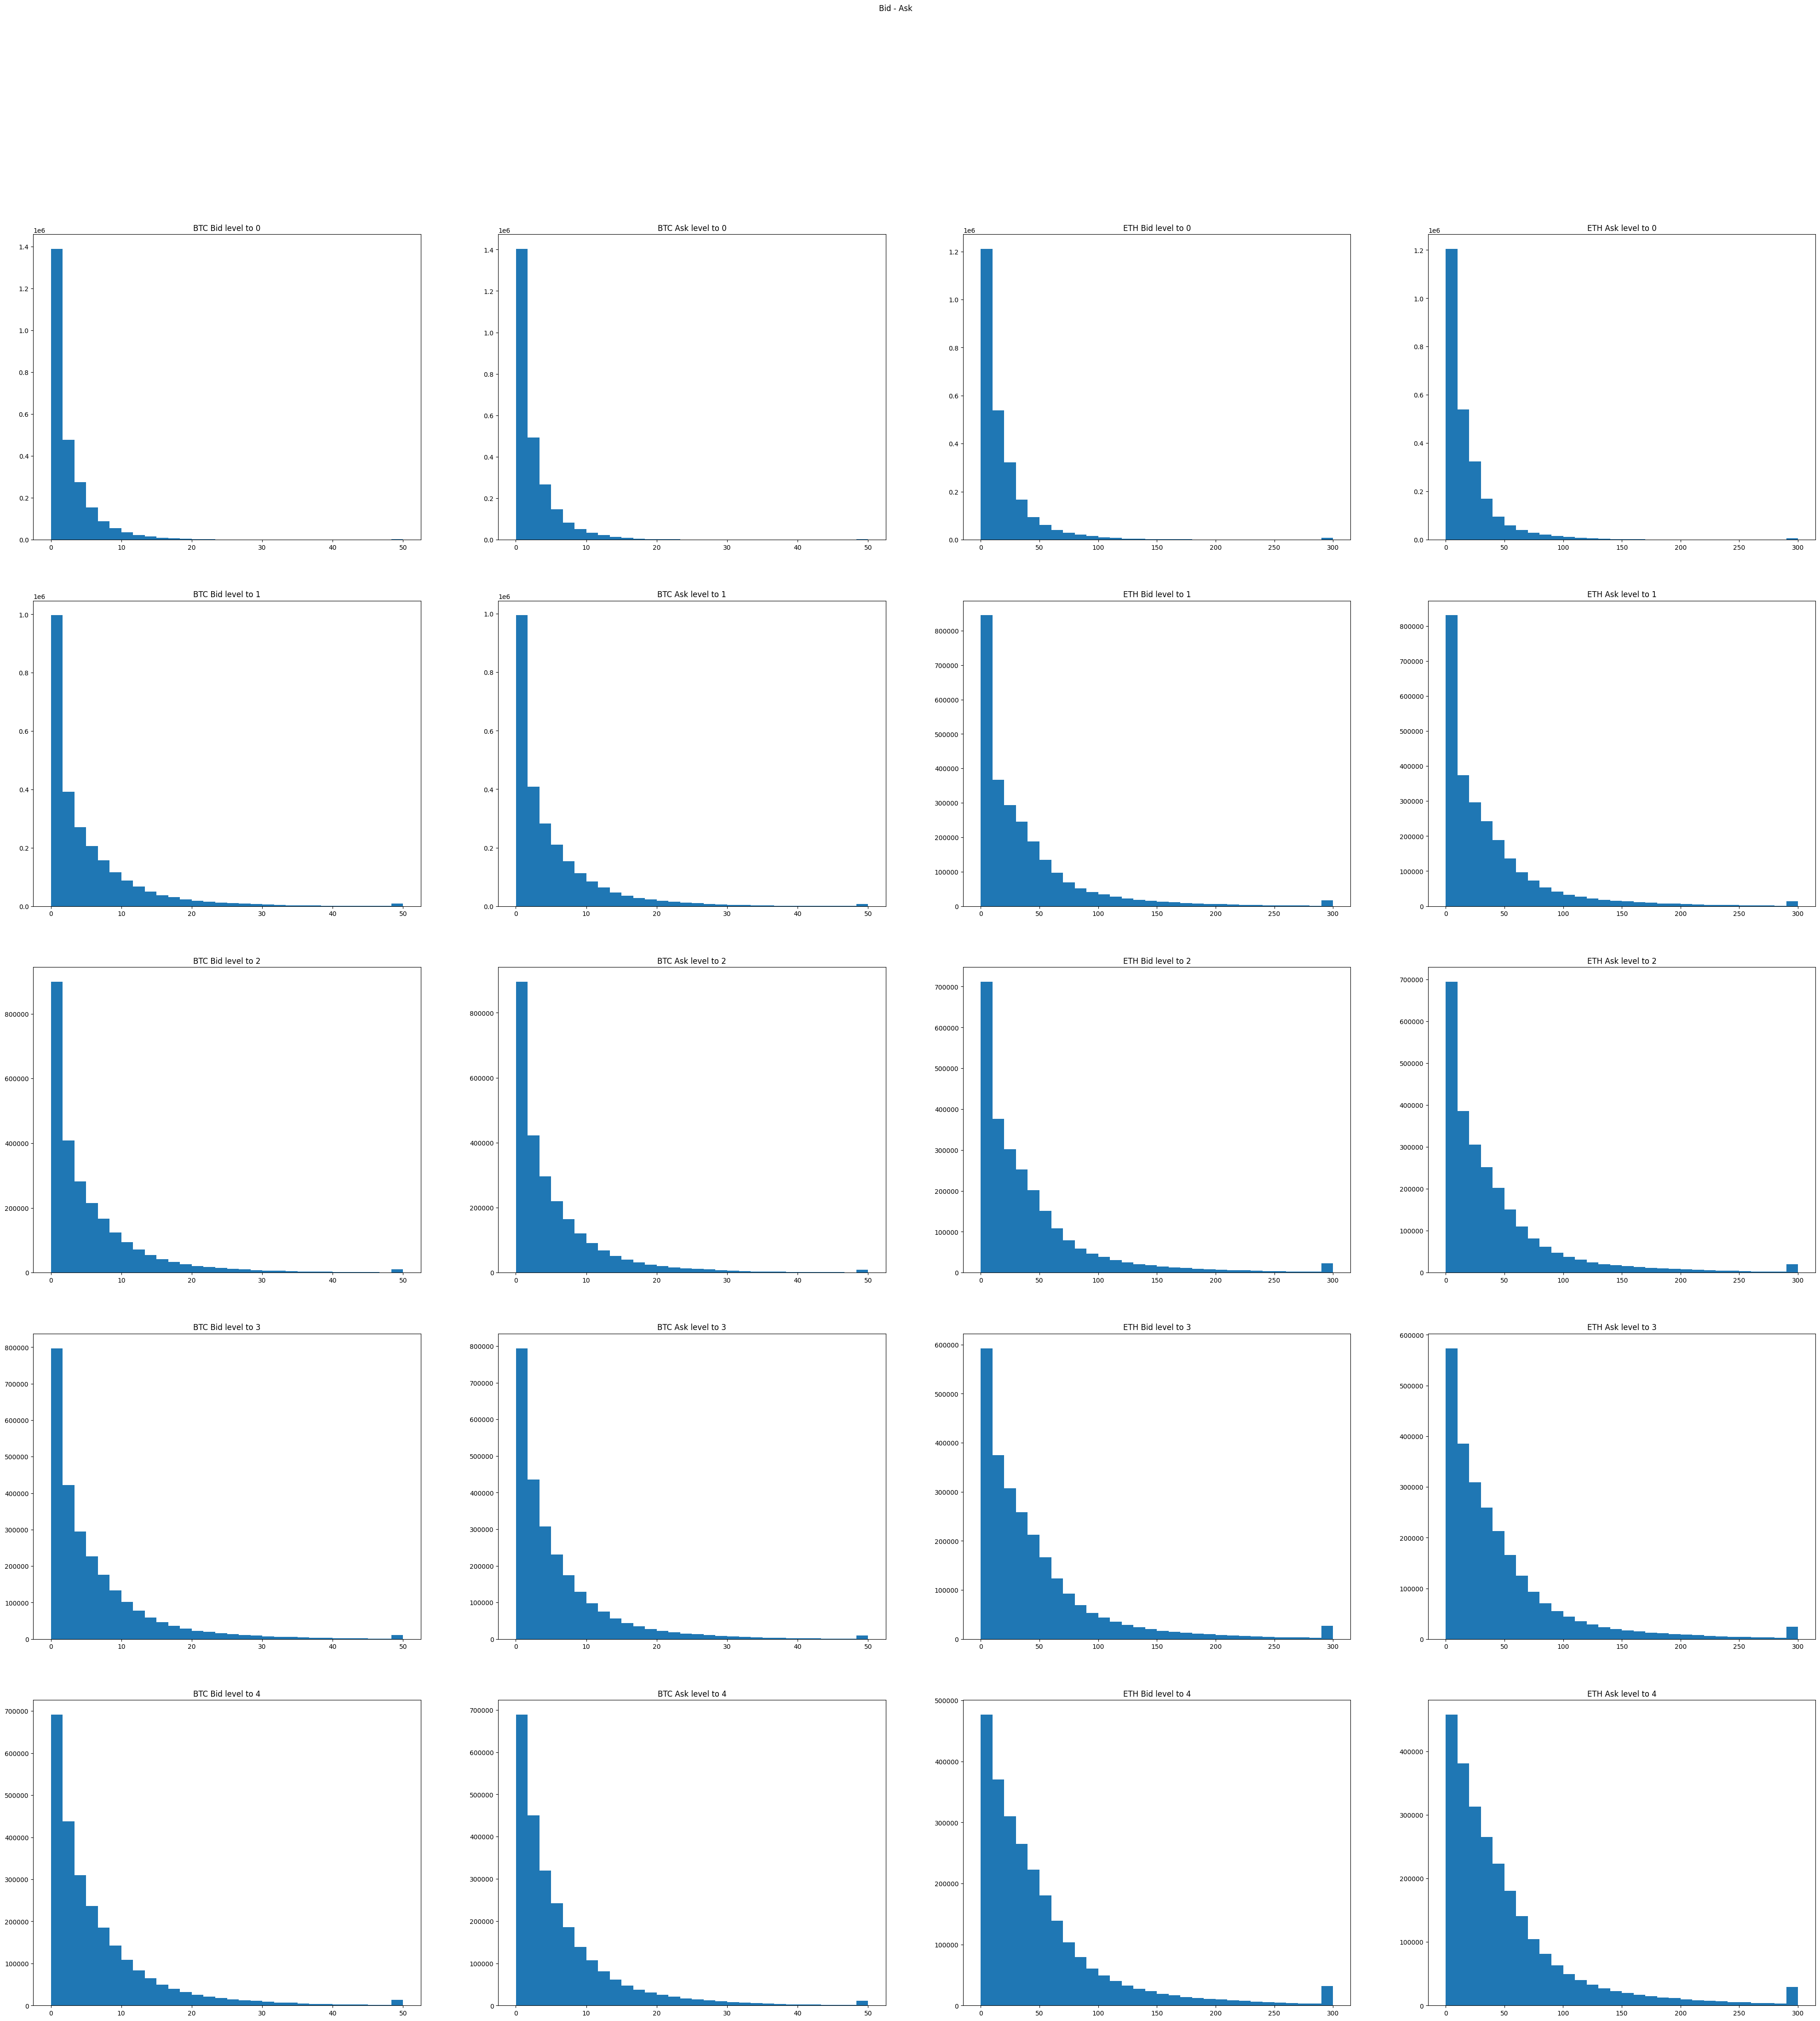

In [91]:
fig, axs = plt.subplots(5, 4, figsize=(50, 50))
fig.suptitle('Bid - Ask')

clip_n_btc = 50
clip_n_eth = 300
n_bins=30

for i in range(5):
    axs[i][0].hist(btc_lobs['bid_cumvol_' + str(i)].clip(0, clip_n_btc), bins=n_bins)
    axs[i][0].set_title('BTC Bid level to ' + str(i))
    axs[i][1].hist(btc_lobs['ask_cumvol_' + str(i)].clip(0, clip_n_btc), bins=n_bins)
    axs[i][1].set_title('BTC Ask level to ' + str(i))

    axs[i][2].hist(eth_lobs['bid_cumvol_' + str(i)].clip(0, clip_n_eth), bins=n_bins)
    axs[i][2].set_title('ETH Bid level to ' + str(i))
    axs[i][3].hist(eth_lobs['ask_cumvol_' + str(i)].clip(0, clip_n_eth), bins=n_bins)
    axs[i][3].set_title('ETH Ask level to ' + str(i))

В целом - паттерны поведения Ask и Bid очень похожи для битка и eth по отдельности. BTC и ETH не похожи друг на друга в плане гистограмм.

### 4

Также нужно построить график величины "пробития" стакана от размера трейда того, насколько "пробивается" стакан в результате трейда. Величиной пробития стакана называется величина измения best_price в результате трейда. Считать также стоит раздельно для каждой стороны.

ХЗ что это значит

### 5

Подумать над связями между ETH и BTC, возможно найти какие-то отставания в объемах торгов или корреляции между мидпрайсами

Я уже замечал связи в 1 и 5 заданиях. Корреляция между мидпрайсами видна (настолько, что я несколько раз проверял в начале - не тот же самый график я нарисовал). Отставания есть - гистограммы в 4) явно показывают, что распределение у ETH более треугольное, у BTC - более гиперболическое.

Как-то так!